In [1]:
from ml5_ipynb import ml5_detector

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Single Object Detection

In [9]:
img_path = 'pic/bird1.jpg'
img = cv2.imread(img_path)
img_rgba = cv2.cvtColor(img, cv2.COLOR_BGR2RGBA)
width = 640
height = 420
resize_size = (width, height)
img_rgba = cv2.resize(img_rgba, resize_size)
x, y, channel = img_rgba.shape

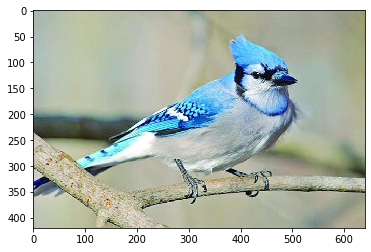

In [10]:
plt.imshow(img_rgba)

In [11]:
model1 = ml5_detector.ObjectDetector('yolo')

........Modeal is ready


In [12]:
model1.image_detect(img_rgba,width=width,height=height)

.........done


In [13]:
model1.detect_result

[{'label': 'bird',
  'confidence': 0.4731248915195465,
  'x': 7.737941741943359,
  'y': 0,
  'width': 395.5834083557129,
  'height': 415.0275573730469,
  'normalized': {'x': 0.018600821495056152,
   'y': 0,
   'width': 0.9509216547012329,
   'height': 0.9976623975313627}}]

In [14]:
detect_result = model1.detect_result[-1]
x = int(detect_result['x'])
y = int(detect_result['y'])
w = int(detect_result['width'])
h = int(detect_result['height'])
x,y,w,h

(7, 0, 395, 415)

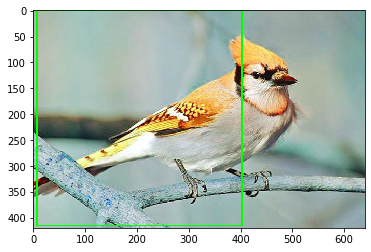

In [22]:
un_img = img_rgba.copy()
un_img = cv2.rectangle(un_img,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(cv2.cvtColor(un_img, cv2.COLOR_BGR2RGB))

In [16]:
normalized_x = int(detect_result['normalized']['x']*width)
normalized_y = int(detect_result['normalized']['y']*height)
normalized_w = int(detect_result['normalized']['width']*width)
normalized_h = int(detect_result['normalized']['height']*height)
normalized_x,normalized_y,normalized_w,normalized_h

(11, 0, 608, 419)

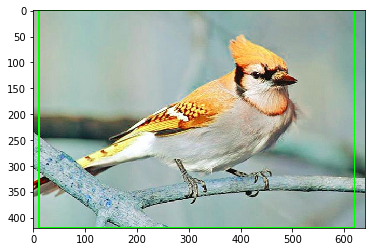

In [24]:
normalized_img = img_rgba.copy()
normalized_img = cv2.rectangle(normalized_img,(normalized_x,normalized_y),
                    (normalized_x+normalized_w,normalized_y+normalized_h),(0,255,0),2)
plt.imshow(cv2.cvtColor(normalized_img, cv2.COLOR_BGR2RGB))

# Multiple Objects Detection

### Example 1

In [16]:
img_path = 'pic/faces.jpg'
img = cv2.imread(img_path)
img_rgba = cv2.cvtColor(img, cv2.COLOR_BGR2RGBA)
width = 800
height = 600
resize_size = (width, height)
img_rgba = cv2.resize(img_rgba, resize_size)
x, y, channel = img_rgba.shape

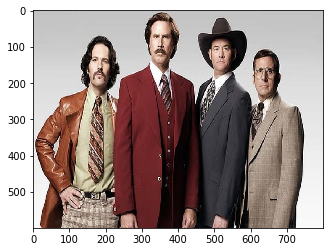

In [17]:
plt.imshow(img_rgba)

In [18]:
model_multi = ml5_detector.ObjectDetector('yolo')

........Modeal is ready


In [19]:
model_multi.image_detect(img_rgba,width=width,height=height)

...............done


In [ ]:
# model_multi.detect_result

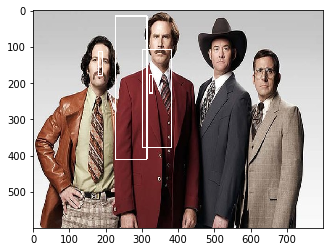

In [20]:
col = [(255,0,0),(200,255,0),(0,255,0),(0,0,255)]
un_img = img_rgba.copy()
for i in range(len(model_multi.detect_result)):
    dt = model_multi.detect_result[i]
    x = int(dt['x'])
    y = int(dt['y'])
    w = int(dt['width'])
    h = int(dt['height'])
    un_img = cv2.rectangle(un_img,(x, y),
                        (x+w, y+h),col[i],2)
plt.imshow(un_img)

tie 345 164 24 94
person 435 23 169 569
person 582 154 155 390
tie 617 256 19 73


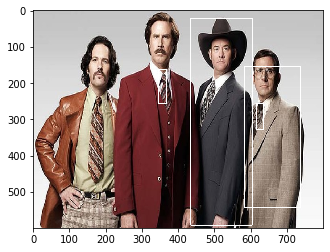

In [21]:
normalized_img = img_rgba.copy()
for i in range(len(model_multi.detect_result)):
    dt = model_multi.detect_result[i]
    normalized_x = int(dt['normalized']['x']*width)
    normalized_y = int(dt['normalized']['y']*height)
    normalized_w = int(dt['normalized']['width']*width)
    normalized_h = int(dt['normalized']['height']*height)
    print(dt['label'],normalized_x,normalized_y,normalized_w,normalized_h )
    normalized_img = cv2.rectangle(normalized_img,(normalized_x,normalized_y),
                        (normalized_x+normalized_w,normalized_y+normalized_h),(0,255,0),2)

plt.imshow(normalized_img)

### Example 2

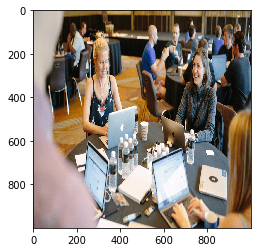

In [22]:
img_path = 'pic/meeting.png'
img = cv2.imread(img_path)
img_rgba = cv2.cvtColor(img, cv2.COLOR_BGR2RGBA)
width = 1000
height = 1000
resize_size = (width, height)
img_rgba = cv2.resize(img_rgba, resize_size)
x, y, channel = img_rgba.shape
plt.imshow(img_rgba)

In [23]:
model_multi2 = ml5_detector.ObjectDetector('yolo')

........Modeal is ready


In [24]:
model_multi2.detect_result = []
model_multi2.image_detect('pic/meeting.png',width=width,height=height)

...done


bottle 701 531 35 108
wine glass 368 447 112 242


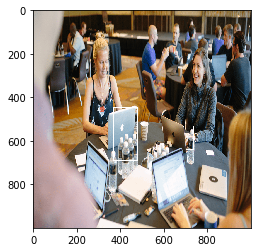

In [25]:
normalized_img = img_rgba.copy()
for i in range(len(model_multi2.detect_result)):
    dt = model_multi2.detect_result[i]
    normalized_x = int(dt['normalized']['x']*width)
    normalized_y = int(dt['normalized']['y']*height)
    normalized_w = int(dt['normalized']['width']*width)
    normalized_h = int(dt['normalized']['height']*height)
    print(dt['label'],normalized_x,normalized_y,normalized_w,normalized_h )
    normalized_img = cv2.rectangle(normalized_img,(normalized_x,normalized_y),
                        (normalized_x+normalized_w,normalized_y+normalized_h),(0,255,0),2)

plt.imshow(normalized_img)